# Perform image registration to correct motion 

Memory maps a file and performs motion correction. Use ``apply_shifts=False`` to run without changing the data.

The file needs to be mapped in ``r+`` mode


In [9]:
localdisk = 'd:\\temp_folder' # this should be an SSD or a fast drive
from wfieldtools import *

dat_path = glob(pjoin(localdisk,'*.dat'))[0]
# open file with read/write 
dat = mmap_dat(dat_path, mode='r+')

yshifts,xshifts,avg_dat = motion_correct(dat,chunksize=512,
                                         mask_edge=50,
                                         apply_shifts=False)
del dat # close and finish writing

# save the shifts
shifts = np.rec.array([yshifts,xshifts],dtype=[('y','int'),('x','int')])
np.save(pjoin(localdisk,'motion_correction_shifts.npy'),shifts)

# update the averages
np.save(pjoin(localdisk,'frames_average.npy'),avg_dat)


Motion correction: 100%|██████████| 38/38 [09:17<00:00, 14.66s/it]


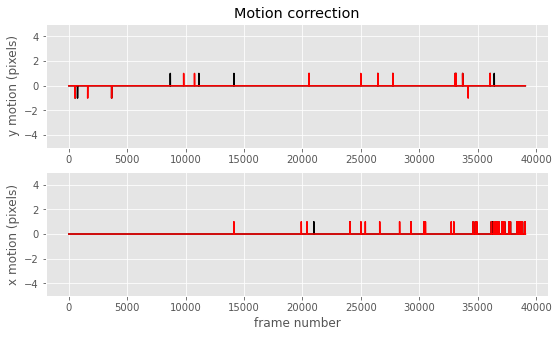

In [31]:
# plot the shifts
%matplotlib inline

plt.matplotlib.style.use('ggplot')
fig = plt.figure(figsize=[9,5])

fig.add_subplot(2,1,1)
plt.plot(yshifts[:,0],'k')
plt.plot(yshifts[:,1],'r')
plt.title('Motion correction')
plt.ylabel('y motion (pixels)')
plt.ylim([-5,5])

fig.add_subplot(2,1,2)
plt.plot(xshifts[:,0],'k')
plt.plot(xshifts[:,1],'r')
plt.ylim([-5,5])
plt.ylabel('x motion (pixels)')
plt.xlabel('frame number');

In [19]:
# Look at the data
dat = mmap_dat(dat_path, mode='r')
napari_show(dat)
del dat